In [2]:
# import requisite packages
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('pairwise_symm.csv')

In [4]:
df=df.loc[df.Type_Real!='NR',:]

In [5]:
df

,% FM,% CB,Pairwise Symmetry,Recruitment,Type_Real,Timepoint
2,0.0,73.1,0.292064,CB Selective,EP2,30
3,0.0,78.4,0.495807,CB Selective,EP2,30
6,0.0,48.5,0.444743,CB Selective,EP2,30
7,0.0,57.4,0.562031,CB Selective,EP2,30
8,0.0,74.2,0.905295,CB Selective,EP1,30
...,...,...,...,...,...,...
467,0.1,32.2,0.238487,Non Selective,EP2,120
468,0.0,0.7,0.347845,CB Selective,NoAgr,120
469,0.0,0.7,0.191048,CB Selective,EP1,120
470,0.0,1.4,0.425515,CB Selective,EP1,120


/Users/as822/opt/anaconda3/envs/mne2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/as822/opt/anaconda3/envs/mne2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/as822/opt/anaconda3/envs/mne2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/as822/opt/anaconda3/envs/mne2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

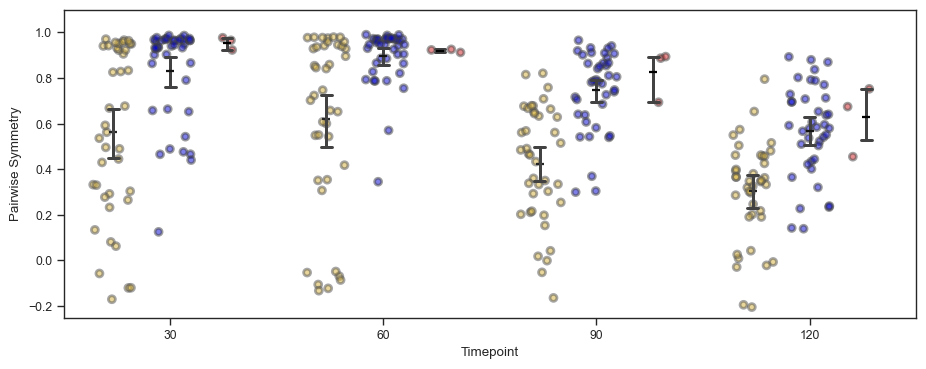

In [8]:
pal=["#d4af37","#0000d5","#cc1a1e"]
jama_palette=sns.set_palette(pal,);
sns.set(font_scale=1,palette=pal,style="ticks",context="paper")

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(11,4))
sns.stripplot(data=df,
              x='Timepoint',
              y='Pairwise Symmetry',
              hue='Recruitment',
              dodge=True,
              alpha=0.5,
              ax=ax,
              jitter=0.3,
             zorder=-1000,
             linewidth=2,
              palette=sns.color_palette(pal),
              edgecolor='gray'
             )

b=sns.barplot(data=df,
           x='Timepoint',
           y='Pairwise Symmetry',
           hue='Recruitment',
           facecolor=(0, 0, 0, 0),ax=ax,
           capsize=0.05,errorbar='ci',linewidth=0)#,err_kws={"color": "k", "linewidth": 2.5},)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=df, x="Timepoint", y="Pairwise Symmetry", hue="Recruitment",
    dodge=.8 - .8 / 3, errorbar=None,linestyles="none",markers="_",scale=1,color='k',
)

# Improve the legend
ax.get_legend().set_visible(False)
ax.set_ylim(-0.25,1.1)
# plt.setp(b, zorder=100)
fig.savefig("fig3_replot_resize.eps", format='eps')
fig.savefig("fig3_replot_resize.pdf", format='pdf')